# Predicting Delivery Service Travel Time using Multiple Linear Regression

<img src="https://www.transportify.com.ph/wp-content/uploads/sites/5/2018/07/local-delivery-service-philippines-og-1.jpg">

You are a small business owner for nationwide delivery services who offers same-day delivery for different types of packages. You are able to use Google Maps to group individual deliveries into one trip to reduce time and fuel costs. Therefore, some trips will have more than one delivery

As an owner of a delivery service, you would like to be able to estimate how long a delivery will take based on three factors,

1. The total distance of the trip in miles
2. The number of deliveries that must be made during the triop
3. The daily price of gas

As a Machine Learning Engineer, you decided to use **Multiple Linear Regression**

## Multiple Linear Regression

Multiple Linear Regression is an extension of simple linear regression

<img src="https://miro.medium.com/v2/resize:fit:506/0*BCQFE5Q25h_JtoPB.jpg">

Things to consider in Multiple Linear Regression

- Adding more independent variables to a multiple linear regression procedure does not mean the regression will be "better" or offer better predictions. In fact, it can make things worse.
- The addition of more independent variables create more relationships among them. So not only are the independent variables potentially related to the dependent variables, they are also potentially related to each other. When this happens, it is called **multicollinearity**
- The ideal is afor all the independent variables to be correlated with the dependent variable but NOT with each other.

Prep work:
- Correlations
- Scatter plots
- Simple regressions


Conducting multiple regression analysis requires a fair amount of pre-work before actually running the regression. Here are the steps:
1. Generate a list of potential variables; independent and dependent
2. Collect data on the variables
3. Check the relationships between each independent variable and the dependent variable using scatterplots and correlations.
4. Check the relationships among the independent variables using scatterplots and correlations.
5. (Optional) Conduct simple linear regressions for each independent variable and dependent variable pair.
6. Use the non-redundant independent variables in the analysis to find the best fitting model.
7. Use the best fitting model to make predictions about the dependent variable.



In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm

In [149]:
df = pd.read_excel('traveldata.xlsx')

In [150]:
df

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8
5,77,3,3.57,6.4
6,80,3,3.03,7.0
7,66,2,3.51,5.6
8,109,5,3.54,7.3
9,76,3,3.25,6.4


## Correlation

### Check the relationships between each independent variable and the dependent variable using scatterplots and correlations.

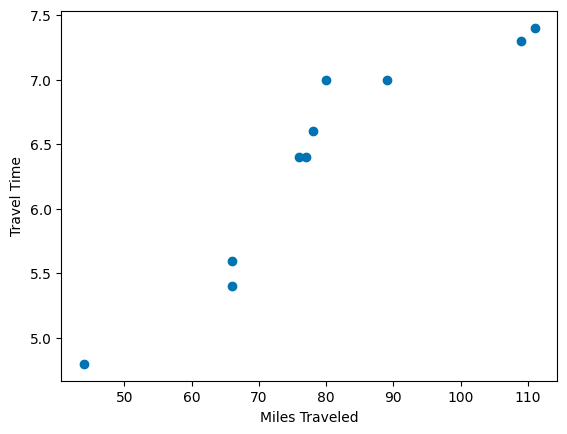

In [151]:
plt.scatter(df["Miles Traveled"],
            df["Travel Time"])

plt.xlabel("Miles Traveled")
plt.ylabel("Travel Time")
plt.show()

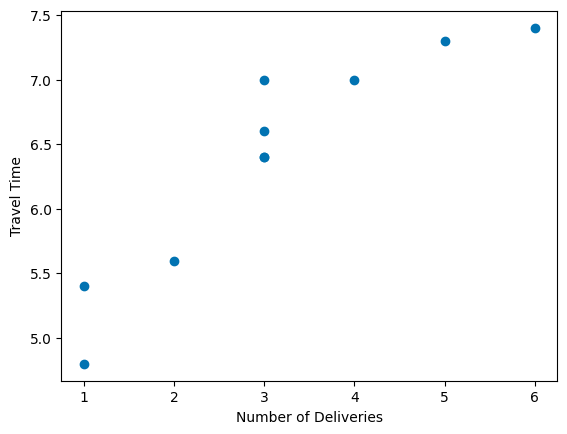

In [152]:
plt.scatter(df["Number of Deliveries"],
            df["Travel Time"])

plt.xlabel("Number of Deliveries")
plt.ylabel("Travel Time")
plt.show()

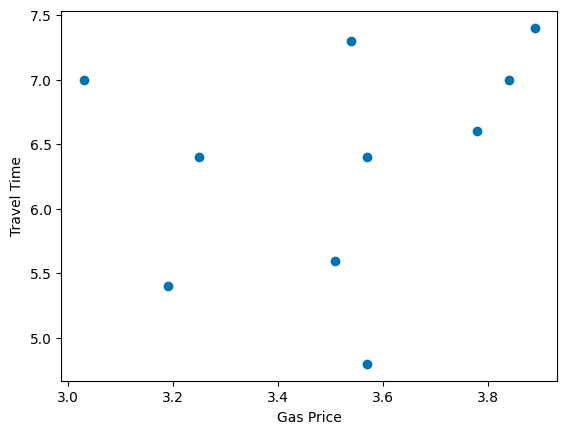

In [153]:
plt.scatter(df["Gas Price"],
            df["Travel Time"])

plt.xlabel("Gas Price")
plt.ylabel("Travel Time")
plt.show()

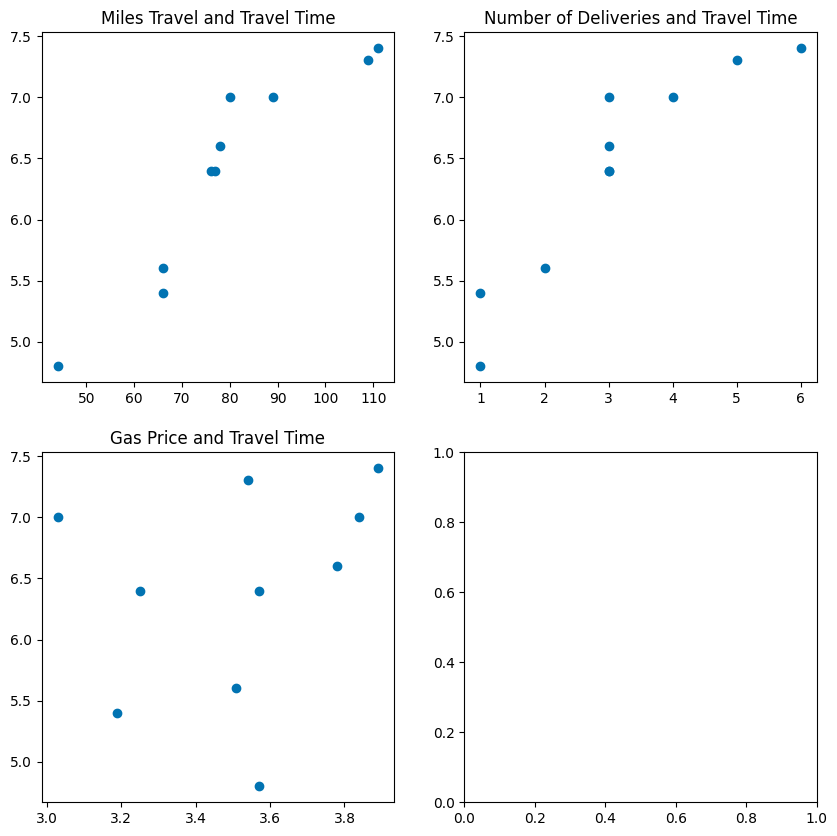

In [154]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0, 0].scatter(df["Miles Traveled"], df["Travel Time"])
ax[0, 1].scatter(df["Number of Deliveries"], df["Travel Time"])
ax[1, 0].scatter(df["Gas Price"], df["Travel Time"])

ax[0, 0].set_title("Miles Travel and Travel Time")
ax[0, 1].set_title("Number of Deliveries and Travel Time")
ax[1, 0].set_title("Gas Price and Travel Time")
plt.show()

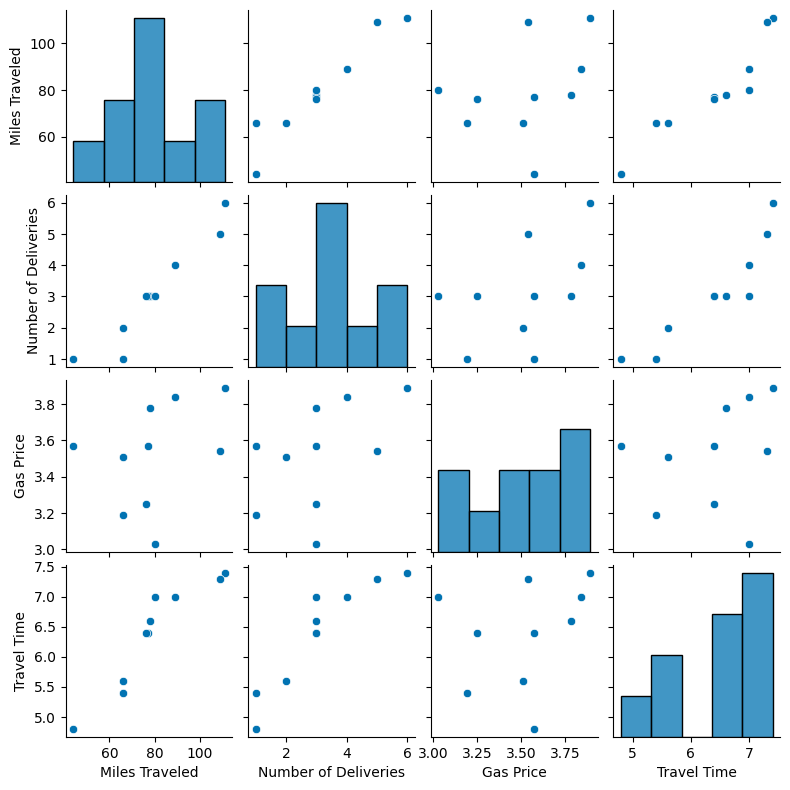

In [155]:
# Using seaborne Pairplot
sns.set_palette('colorblind')
sns.pairplot(data=df, height=2)

In [156]:
# Calculating correlation coefficient and p-value between Miles Traveled and Travel Time
result = pearsonr(df['Miles Traveled'], df['Travel Time'])
print("Miles Traveled and Travel Time")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Miles Traveled and Travel Time
correlation coefficient: 0.928178500887476
p-value: 0.00010667565429896801


In [157]:
# Calculating correlation coefficient and p-value between Number of Deliveries and Travel Time
result = pearsonr(df['Number of Deliveries'], df['Travel Time'])
print("Number of Deliveries and Travel Time")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Number of Deliveries and Travel Time
correlation coefficient: 0.9164433964470268
p-value: 0.00019260878342962958


In [158]:
# Calculating correlation coefficient and p-value between Gas Price and Travel Time
result = pearsonr(df['Gas Price'], df['Travel Time'])
print("Gas Price and Travel Time")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Gas Price and Travel Time
correlation coefficient: 0.2672115310193847
p-value: 0.45545341268508166


#### Findings

Dependent variables vs independent variables
- Travel time appears highly correlated with Miles Traveled
- Travel time appears highly correlated with Number of Deliveries
- Travel time does not appear highly correlated with gas price

Since Gas Price does not appear correlated with the dependent variable we would not use Gas Price in our multiple regression model.

### Check the relationships among the independent variables using scatterplots and correlations.

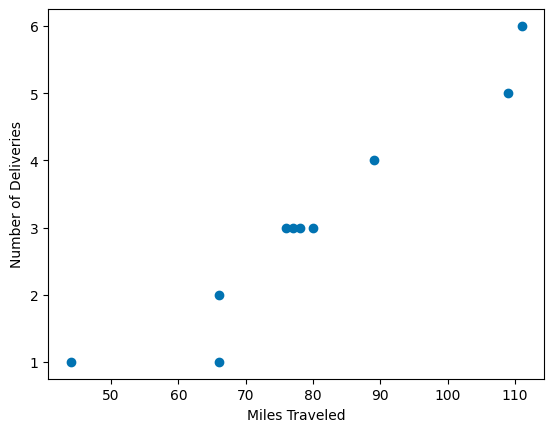

In [159]:
plt.scatter(df["Miles Traveled"],
            df["Number of Deliveries"])

plt.xlabel("Miles Traveled")
plt.ylabel("Number of Deliveries")
plt.show()

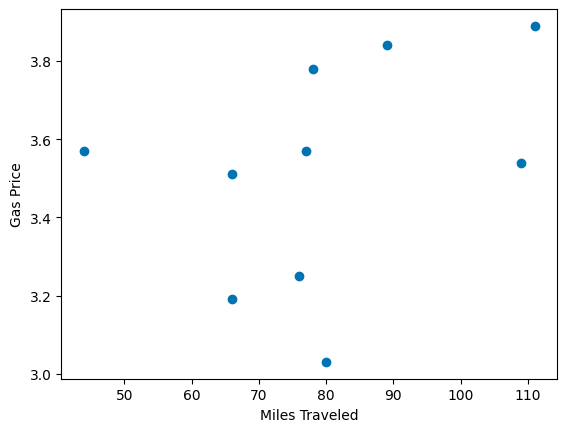

In [160]:
plt.scatter(df["Miles Traveled"],
            df["Gas Price"])

plt.xlabel("Miles Traveled")
plt.ylabel("Gas Price")
plt.show()

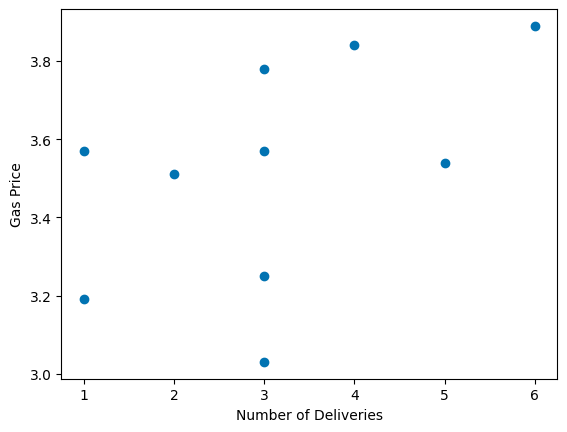

In [161]:
plt.scatter(df["Number of Deliveries"],
            df["Gas Price"])

plt.xlabel("Number of Deliveries")
plt.ylabel("Gas Price")
plt.show()

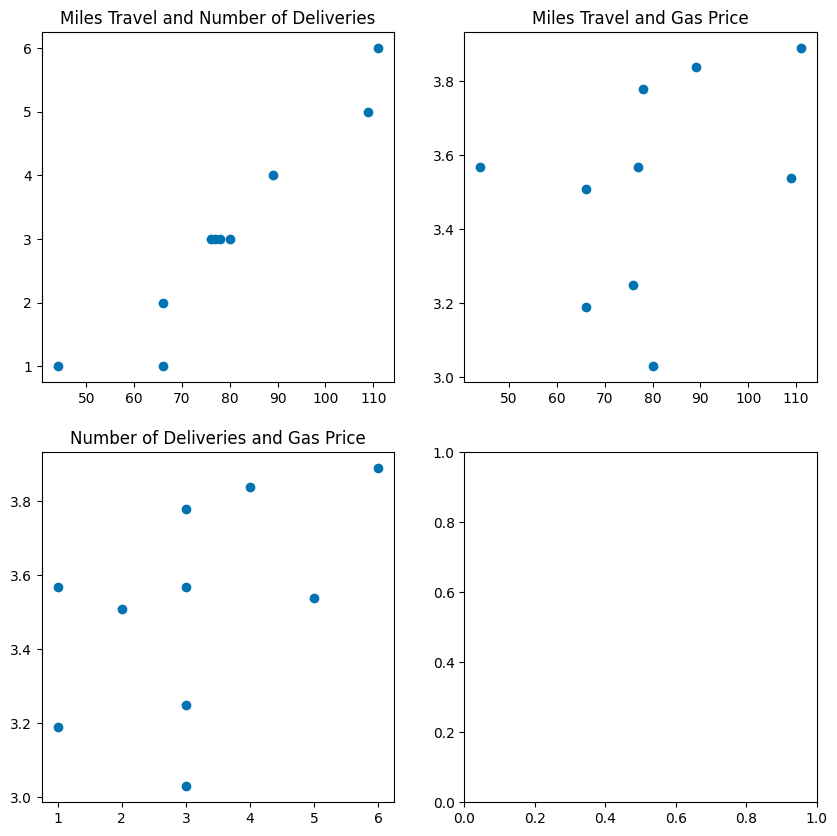

In [162]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0, 0].scatter(df["Miles Traveled"], df["Number of Deliveries"])
ax[0, 1].scatter(df["Miles Traveled"], df["Gas Price"])
ax[1, 0].scatter(df["Number of Deliveries"], df["Gas Price"])

ax[0, 0].set_title("Miles Travel and Number of Deliveries")
ax[0, 1].set_title("Miles Travel and Gas Price")
ax[1, 0].set_title("Number of Deliveries and Gas Price")
plt.show()

In [163]:
# Calculating correlation coefficient and p-value between Miles Traveled and Number of Deliveries
result = pearsonr(df['Miles Traveled'], df['Number of Deliveries'])
print("Miles Traveled and Number of Deliveries")
print("correlation coefficient:", result[0])
print("p-value:", result[1])


Miles Traveled and Number of Deliveries
correlation coefficient: 0.9558982066200347
p-value: 1.5690314407660616e-05


In [164]:
# Calculating correlation coefficient and p-value between Miles Traveled and Gas Price
result = pearsonr(df['Miles Traveled'], df['Gas Price'])
print("Miles Traveled and Gas Price")
print("correlation coefficient:", result[0])
print("p-value:", result[1])


Miles Traveled and Gas Price
correlation coefficient: 0.35579623354708517
p-value: 0.31296405908178965


In [165]:
# Calculating correlation coefficient and p-value between Number of Deliveries and Gas Price
result = pearsonr(df['Number of Deliveries'], df['Gas Price'])
print("Number of Deliveries and Gas Price")
print("correlation coefficient:", result[0])
print("p-value:", result[1])


Number of Deliveries and Gas Price
correlation coefficient: 0.4982421647401633
p-value: 0.142741207670319


#### Findings

Independent variable vs Independent variable.
- Number of Deliveries appears highly correlated with Miles Traveled. **This is Multicollinearity**.
- Miles Traveled does not appear highly correlated with Gas Price
- Gas Price does not appear correlated with Number of Deliveries.

Since **Number of Deliveries** is highly correlated with **Miles Traveled**, we would not use both in our  multiple regression model.

 **They are redundant**.

### Correlation Summary

In [166]:
correlation = df.corr()
correlation

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
Miles Traveled,1.000000,0.955898,0.355796,0.928179
Number of Deliveries,0.955898,1.000000,0.498242,0.916443
Gas Price,0.355796,0.498242,1.000000,0.267212
Travel Time,0.928179,0.916443,0.267212,1.000000


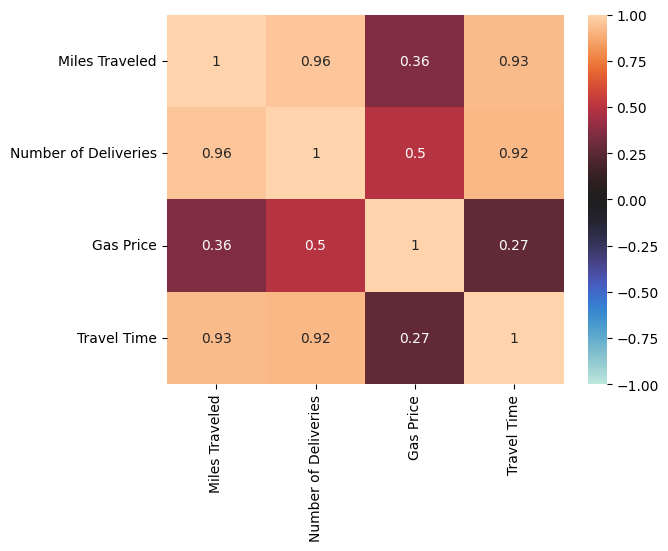

In [167]:
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

There are redundant multicollinear variables:
- Miles Traveled and Number of Deliveries are both highly correlated with each other and therefore are **redundant**. Only one should be used in the multiple linear regression model.

There are non-contributing variables:
- Gas Price is not correlated with the dependent variable and should be excluded.

## Building Different Regression Models

### Model 1: Miles Traveled and Travel Time

In [168]:
# Set independent and dependent variables
X = df[['Miles Traveled']]
X = sm.add_constant(X)
y = df['Travel Time']

In [169]:
# Initialize model from sklearn and fit it into our data
mlr_model = LinearRegression()

# Train the model
mlr_model.fit(X, y)

# Test the model using the same input data
y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 3.1855602489995554
Coefficients: [0.         0.04025678]


In [170]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     49.77
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           0.000107
Time:                        11:54:15   Log-Likelihood:                -2.3532
No. Observations:                  10   AIC:                             8.706
Df Residuals:                       8   BIC:                             9.312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1856      0.467      6.822      0.000       2.109       4.262
Miles Traveled     0.0403      0.006      7.055      0.000       0.027       0.053
==============================================================================
Omnibus:                        0.542   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.763   Jarque-Bera (JB):                0.554
Skew:                           0.370   Prob(JB):                        0.758
Kurtosis:                       2.115   Cond. No.                         353.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
print(olsmod.rsquared)

0.8615153295097224


### Model 2: Number of Deliveries and Travel Time

In [172]:
# Set independent and dependent variables
X = df[['Number of Deliveries']]
X = sm.add_constant(X)
y = df['Travel Time']

In [173]:
# Initialize model from sklearn and fit it into our data
mlr_model = LinearRegression()

# Train the model
mlr_model.fit(X, y)

# Test the model using the same input data
y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 4.84541484716157
Coefficients: [0.         0.49825328]


In [174]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     41.96
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           0.000193
Time:                        11:54:15   Log-Likelihood:                -3.0794
No. Observations:                  10   AIC:                             10.16
Df Residuals:                       8   BIC:                             10.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8454      0.265     18.261      0.000       4.234       5.457
Number of Deliveries     0.4983      0.077      6.478      0.000       0.321       0.676
==============================================================================
Omnibus:                        0.391   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.065
Skew:                           0.147   Prob(JB):                        0.968
Kurtosis:                       2.736   Cond. No.                         8.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
print(olsmod.rsquared)

0.8398684988913625


### Model 3: Gas Price and Travel Time

In [176]:
# Set independent and dependent variables
X = df[['Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [177]:
# Initialize model from sklearn and fit it into our data
mlr_model = LinearRegression()

# Train the model
mlr_model.fit(X, y)

# Test the model using the same input data
y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 3.536488198199421
Coefficients: [0.         0.81134825]


In [178]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                    0.6151
Date:                Mon, 02 Sep 2024   Prob (F-statistic):              0.455
Time:                        11:54:15   Log-Likelihood:                -11.868
No. Observations:                  10   AIC:                             27.74
Df Residuals:                       8   BIC:                             28.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5365      3.649      0.969      0.361      -4.878      11.951
Gas Price      0.8113      1.034      0.784      0.455      -1.574       3.197
==============================================================================
Omnibus:                        1.232   Durbin-Watson:                   2.823
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                0.765
Skew:                          -0.619   Prob(JB):                        0.682
Kurtosis:                       2.451   Cond. No.                         49.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
print(olsmod.rsquared)

0.07140200230972338


### Model 4: Miles Traveled, Number of Deliveries and Travel Time

In [182]:
# Set independent and dependent variables
X = df[['Miles Traveled', 'Number of Deliveries']]
X = sm.add_constant(X)
y = df['Travel Time']

In [183]:
# Initialize model from sklearn and fit it into our data
mlr_model = LinearRegression()

# Train the model
mlr_model.fit(X, y)

# Test the model using the same input data
y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 3.732158131682609
Coefficients: [0.         0.02622257 0.18404052]


In [184]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     23.72
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           0.000763
Time:                        11:58:18   Log-Likelihood:                -1.9830
No. Observations:                  10   AIC:                             9.966
Df Residuals:                       7   BIC:                             10.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7322      0.887      4.208      0.004       1.635       5.830
Miles Traveled           0.0262      0.020      1.310      0.232      -0.021       0.074
Number of Deliveries     0.1840      0.251      0.733      0.487      -0.409       0.777
==============================================================================
Omnibus:                        1.340   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.867
Skew:                           0.654   Prob(JB):                        0.648
Kurtosis:                       2.393   Cond. No.                         670.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
olsmod.rsquared

0.871399502997586

### Model 5: Miles Travel, Gas Price and Travel Time

In [190]:
# Set independent and dependent variables
X = df[['Miles Traveled', 'Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [191]:
# Initialize model from sklearn and fit it into our data
mlr_model = LinearRegression()

# Train the model
mlr_model.fit(X, y)

# Test the model using the same input data
y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 3.867569888312455
Coefficients: [ 0.          0.04137042 -0.21912293]


In [192]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     22.63
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           0.000879
Time:                        12:00:06   Log-Likelihood:                -2.1863
No. Observations:                  10   AIC:                             10.37
Df Residuals:                       7   BIC:                             11.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.8676      1.482      2.609      0.035       0.362       7.373
Miles Traveled     0.0414      0.006      6.445      0.000       0.026       0.057
Gas Price         -0.2191      0.449     -0.488      0.641      -1.282       0.844
==============================================================================
Omnibus:                        0.731   Durbin-Watson:                   2.740
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.563
Skew:                           0.025   Prob(JB):                        0.755
Kurtosis:                       1.839   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
olsmod.rsquared

0.8660640485080335

### Model 6: Number of Deliveries, Gas Price and Travel Time

In [194]:
# Set independent and dependent variables
X = df[['Number of Deliveries', 'Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [195]:
# Initialize model from sklearn and fit it into our data
mlr_model = LinearRegression()

# Train the model
mlr_model.fit(X, y)

# Test the model using the same input data
y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 7.324307017016417
Coefficients: [ 0.          0.56650081 -0.76498707]


In [196]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     27.63
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           0.000476
Time:                        12:01:42   Log-Likelihood:                -1.3104
No. Observations:                  10   AIC:                             8.621
Df Residuals:                       7   BIC:                             9.529
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.3243      1.458      5.025      0.002       3.878      10.771
Number of Deliveries     0.5665      0.079      7.129      0.000       0.379       0.754
Gas Price               -0.7650      0.444     -1.724      0.128      -1.814       0.284
==============================================================================
Omnibus:                        1.321   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                0.811
Skew:                           0.339   Prob(JB):                        0.667
Kurtosis:                       1.781   Cond. No.                         71.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
olsmod.rsquared

0.8875862701921513

### Model 7: Miles Traveled, Number of Deliveries, Gas Price and Travel Time

In [198]:
# Set independent and dependent variables
X = df[['Miles Traveled', 'Number of Deliveries', 'Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [199]:
# Initialize model from sklearn and fit it into our data
mlr_model = LinearRegression()

# Train the model
mlr_model.fit(X, y)

# Test the model using the same input data
y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 6.211377663979402
Coefficients: [ 0.          0.01412189  0.38315024 -0.60655271]


In [200]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     16.99
Date:                Mon, 02 Sep 2024   Prob (F-statistic):            0.00245
Time:                        12:04:27   Log-Likelihood:               -0.98426
No. Observations:                  10   AIC:                             9.969
Df Residuals:                       6   BIC:                             11.18
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.2114      2.321      2.677      0.037       0.533      11.890
Miles Traveled           0.0141      0.022      0.636      0.548      -0.040       0.068
Number of Deliveries     0.3832      0.300      1.277      0.249      -0.351       1.117
Gas Price               -0.6066      0.527     -1.152      0.293      -1.895       0.682
==============================================================================
Omnibus:                        2.874   Durbin-Watson:                   2.406
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.204
Skew:                           0.457   Prob(JB):                        0.548
Kurtosis:                       1.567   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [201]:
olsmod.rsquared

0.8946842692569462